# Special Topics in Computer Science
## Homework 2
### Prapatsorn Boontam ID:5988010 Section 2

### Data Dictionary


| Variable      | Definition                  | Key                                           |
|---------------|-----------------------------|-----------------------------------------------|
| Age           | Age in years                |                                               |
| Sex           | Gender                      | Male, Female                                  |
| BMI           | Body Mass index value       |                                               |
| Children      | Number of children          |                                               |
| Smoker        | Is that person a smoker?    | Yes, No                                       |
| Region        | Region                      | Middle, south, north, northeast               |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
insurance = pd.read_csv('../cs-hw2/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,middle,16884.92400
1,18,male,33.770,1,no,south,1725.55230
2,28,male,33.000,3,no,south,4449.46200
3,33,male,22.705,0,no,north,21984.47061
4,32,male,28.880,0,no,north,3866.85520


In [3]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
 insurance['sex'].replace('female','0', inplace=True)

In [10]:
 insurance['sex'].replace('male','1', inplace=True)

In [11]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,middle,16884.92400
1,18,1,33.770,1,no,south,1725.55230
2,28,1,33.000,3,no,south,4449.46200
3,33,1,22.705,0,no,north,21984.47061
4,32,1,28.880,0,no,north,3866.85520


In [12]:
 insurance['smoker'].replace('no','0', inplace=True)

In [13]:
 insurance['smoker'].replace('yes','1', inplace=True)

In [14]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,middle,16884.92400
1,18,1,33.770,1,0,south,1725.55230
2,28,1,33.000,3,0,south,4449.46200
3,33,1,22.705,0,0,north,21984.47061
4,32,1,28.880,0,0,north,3866.85520


In [15]:
 insurance['region'].replace('north','1', inplace=True)

In [16]:
 insurance['region'].replace('northeast','2', inplace=True)

In [17]:
 insurance['region'].replace('middle','3', inplace=True)

In [18]:
 insurance['region'].replace('south','4', inplace=True)

In [19]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,4,1725.55230
2,28,1,33.000,3,0,4,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Answer for Q1
Mean of charges = 13270.42
Variace of charges = 1.466524e+08
Charges doesn't have a normal distribution, it skewed heavily left.

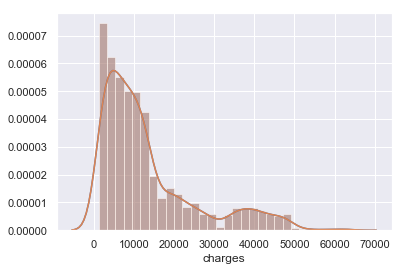

In [26]:
sb.set()
sb.distplot(insurance.charges)
plt.show()

In [27]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
insurance.var()

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

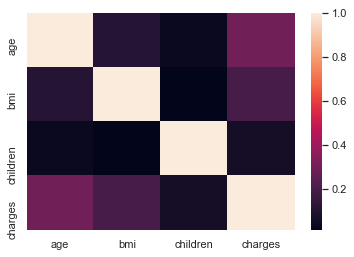

In [29]:
sb.set()
corr=insurance.corr()
sb.heatmap(corr)
plt.show()

## Answer for Q2
The heatmap should work, I have no idea why it didn't, so I use a bunch of scatterplots instead.
Being a smoker or not is the most influence by far. Using other variables as the hue doesn't show any correlations.

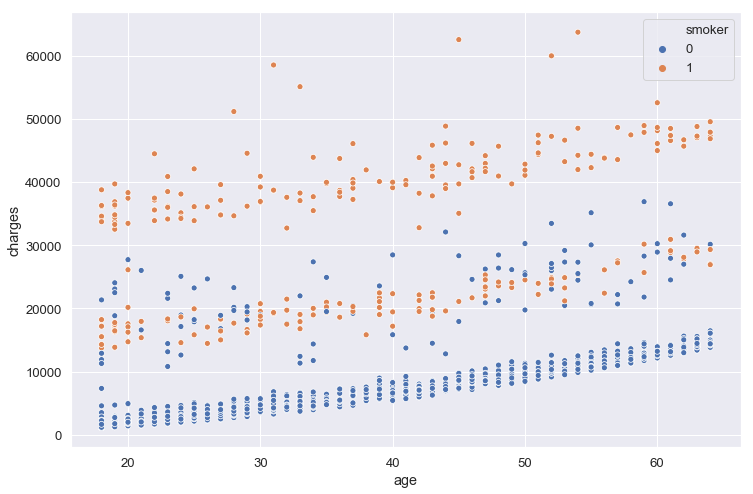

In [32]:
plt.subplots(figsize=(12, 8))
sb.set(font_scale=1.2)
ax = sb.scatterplot(x="age", y="charges", hue='smoker', data=insurance)
plt.show()

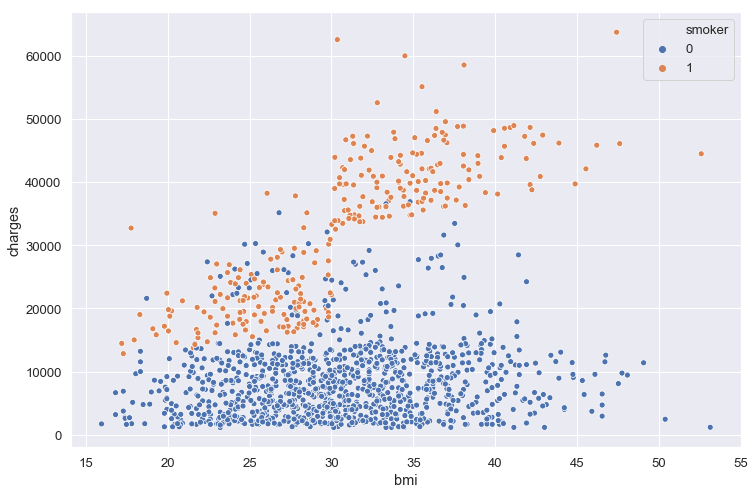

In [33]:
plt.subplots(figsize=(12, 8))
sb.set(font_scale=1.2)
ax = sb.scatterplot(x="bmi", y="charges", hue='smoker', data=insurance)
plt.show()

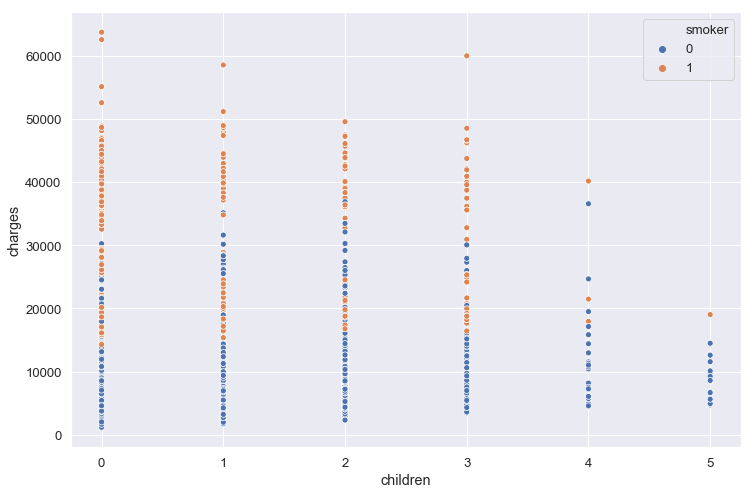

In [36]:
plt.subplots(figsize=(12, 8))
sb.set(font_scale=1.2)
ax = sb.scatterplot(x="children", y="charges", hue='smoker', data=insurance)
plt.show()

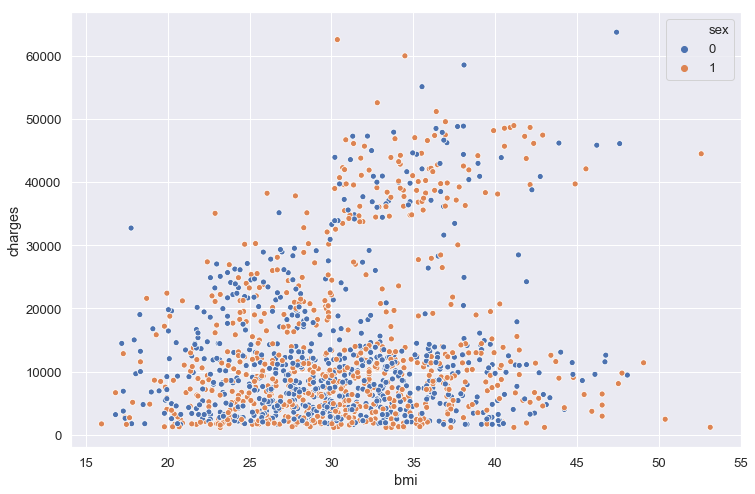

In [38]:
plt.subplots(figsize=(12, 8))
sb.set(font_scale=1.2)
ax = sb.scatterplot(x="bmi", y="charges", hue='sex', data=insurance)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [39]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,4,1725.55230
2,28,1,33.000,3,0,4,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Using Linear Regression

In [40]:
X = insurance.drop('region', axis=1)
Y = insurance['region']

In [43]:
X_train, X_rest, Y_train, Y_rest = train_test_split(
    X, Y, test_size=0.20)
X_valid, X_test, Y_valid, Y_test = train_test_split(
    X_rest, Y_rest, test_size=0.50)

In [44]:
print('Training shape: ', X_train.shape, Y_train.shape)
print('Valid shape: ', X_valid.shape, Y_valid.shape)
print('Test shape: ', X_test.shape, Y_test.shape)

Training shape:  (1070, 6) (1070,)
Valid shape:  (134, 6) (134,)
Test shape:  (134, 6) (134,)


In [45]:
regr = linear_model.LinearRegression()

In [46]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
pred_1 = regr.predict(X_test)

In [66]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error (against test): %.2f"
      % mean_squared_error(Y_test, pred_1))
print("Mean squared error (against valid): %.2f"
      % mean_squared_error(Y_valid, pred_1))
# can't find mean squared error against train because the size is not consistent
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, pred_1))

Coefficients: 
 [-7.19271197e-04  5.41630407e-04  5.01392709e-02 -1.24925834e-02
  3.44350238e-01 -7.03857265e-06]
Mean squared error (against test): 1.07
Mean squared error (against valid): 1.41
Variance score: 0.11


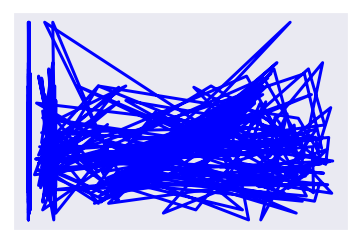

In [51]:
plt.plot(X_test, pred_1, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [67]:
x1 = insurance.drop('age', axis=1)
y1 = insurance['age']

In [68]:
x1_train, x1_rest, y1_train, y1_rest = train_test_split(
    x1, y1, test_size=0.20)
x1_valid, x1_test, y1_valid, y1_test = train_test_split(
    x1_rest, y1_rest, test_size=0.50)

In [79]:
print('Training shape: ', x1_train.shape, y1_train.shape)
print('Valid shape: ', x1_valid.shape, y1_valid.shape)
print('Test shape: ', x1_test.shape, y1_test.shape)

Training shape:  (1070, 6) (1070,)
Valid shape:  (134, 6) (134,)
Test shape:  (134, 6) (134,)


In [70]:
regr = linear_model.LinearRegression()

In [71]:
regr.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
pred_2 = regr.predict(x1_test)

In [85]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error (against test): %.2f"
      % mean_squared_error(y1_test, pred_2))
print("Mean squared error (against valid): %.2f"
      % mean_squared_error(y1_valid, pred_2))
# can't find mean squared error against train because the size is not consistent
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y2_test, pred_1))

Coefficients: 
 [-8.64062420e-04  3.85480326e-03  9.96108326e-03  1.01453939e-01
 -8.82757043e-03  2.01198877e-07]
Mean squared error (against test): 169.78
Mean squared error (against valid): 288.45
Variance score: -17.05


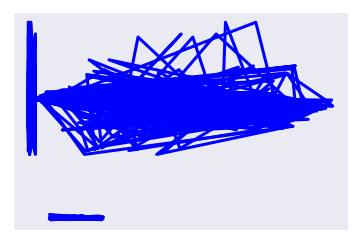

In [75]:
plt.plot(x1_test, pred_2, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [77]:
x2 = insurance.drop('sex', axis=1)
y2 = insurance['sex']

In [78]:
x2_train, x2_rest, y2_train, y2_rest = train_test_split(
    x2, y2, test_size=0.20)
x2_valid, x2_test, y2_valid, y2_test = train_test_split(
    x2_rest, y2_rest, test_size=0.50)

In [80]:
print('Training shape: ', x2_train.shape, y2_train.shape)
print('Valid shape: ', x2_valid.shape, y2_valid.shape)
print('Test shape: ', x2_test.shape, y2_test.shape)

Training shape:  (1070, 6) (1070,)
Valid shape:  (134, 6) (134,)
Test shape:  (134, 6) (134,)


In [81]:
regr = linear_model.LinearRegression()

In [82]:
regr.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
pred_3 = regr.predict(x2_test)

In [87]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error (against test): %.2f"
      % mean_squared_error(y2_test, pred_3))
print("Mean squared error (against valid): %.2f"
      % mean_squared_error(y2_valid, pred_3))
# can't find mean squared error against train because the size is not consistent
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y2_test, pred_3))

Coefficients: 
 [-8.64062420e-04  3.85480326e-03  9.96108326e-03  1.01453939e-01
 -8.82757043e-03  2.01198877e-07]
Mean squared error (against test): 0.25
Mean squared error (against valid): 0.25
Variance score: -0.01


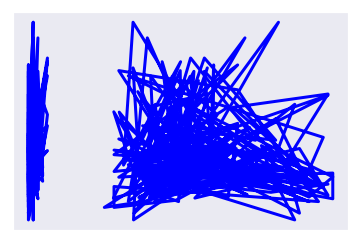

In [90]:
plt.plot(y2_test, pred_3, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Answer for Q3
I'm not sure what the error means from the result, nor do I know that the regression model plotted is correct but the first and third time has similar results, the second time the error varies wildly.

Wikipedia told me the mean squared error tells us about the quality of the estimator and value closer to zero are better. The first and third round results are quite promising then (~1 and 0.25 respectively), I'm really not sure about the second round though. The mean squared error of the second round is in the hundreds.